# Sheet 4

In [9]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.optimize import fsolve

## Task 1. Fixed Points, Stability, and Bifurcations

### Find the fixed points of the system. Visualize these in a graph. Are they stable?

In [58]:
w = 7
theta = -2.5
def model(x):
    return(w * 1 / (1 + np.exp(- x)) + theta)

We find the fixpoint(s) using fsolve from scipy

In [59]:
f = lambda x: x - model(x)
fixpoint = fsolve(f, x0 = 3)
print(fixpoint)

[4.41647135]


We plot the univariate nonlinear map along with the identity line in the below plot

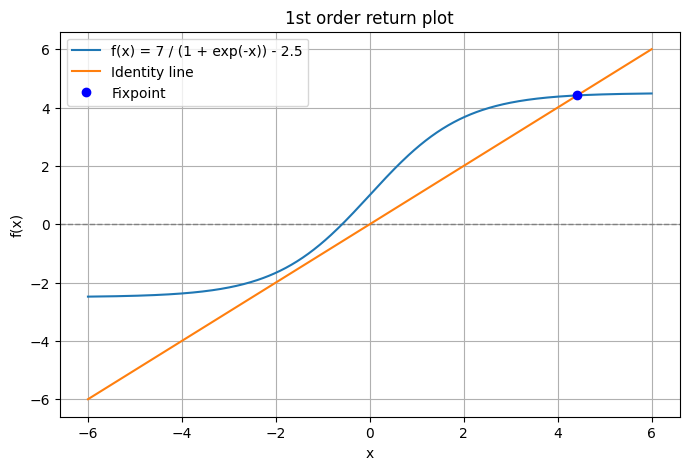

In [60]:
x_vals = np.linspace(-6, 6, 400)
y_vals = model(x_vals)

# Plotting
plt.figure(figsize=(8, 5))
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # horizontal line at y=0
plt.plot(x_vals, y_vals, label=f"f(x) = {w} / (1 + exp(-x)) - 2.5")
plt.plot(range(-6,7), range(-6,7), label=f"Identity line")
plt.plot(fixpoint, model(fixpoint), 'o', color='blue', label="Fixpoint")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("1st order return plot")
plt.legend()
plt.grid(True)
plt.show()

The fixpoint is stable (at least locally). No matter the initial value it seems that the system will converge to the fixpoint. This is seen by following the cobweb obtained by starting at a $x_0$. Furthermore the derivative of the recursive model defining the system is given by
$$f'(x_t) = \frac{w}{\exp(x_t)+\exp(-x_t) + 2}$$
And we know that the fixpoint is locally stable as long as the derivative in the point is smaller than 1 - which is the case for the fixpoint found above. 

In [63]:
w / (np.exp(fixpoint)+np.exp(-fixpoint) + 2)

array([0.08253193])

### For $w = 7$, plot the bifurcation graph as a function of $\theta \in [−10, 0]$. Include both stable and unstable objects. How does the system change its dynamical properties as $\theta$ is varied within this range

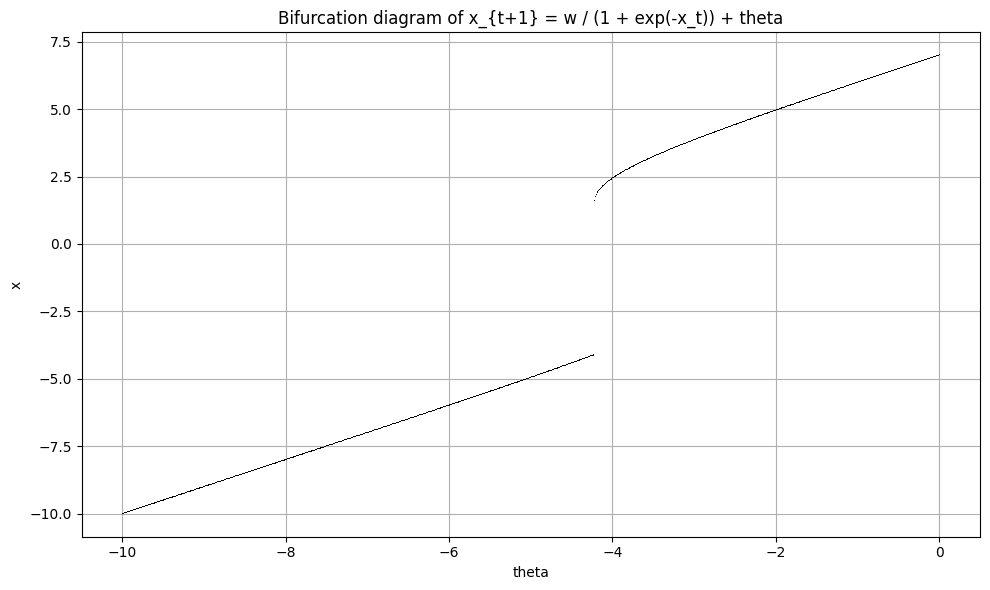

In [ ]:
theta_vals = np.linspace(-10, 0, 1000)
n_transient = 300                # discard these iterations
n_iter = 1000                    # plot these iterations after transient

# Prepare figure
plt.figure(figsize=(10, 6))

# Loop over theta values
for theta in theta_vals:
    x = 4  # initial condition
    # Iterate to get close to attractor
    for _ in range(n_transient):
        x = w / (1 + np.exp(-x)) + theta
    # Now plot the remaining iterations
    x_vals = []
    for _ in range(n_iter):
        x = w / (1 + np.exp(-x)) + theta
        x_vals.append(x)
    # Plot points: one vertical line of x-values for this theta
    plt.plot([theta]*n_iter, x_vals, ',k', alpha=0.3)

# Labels and show
plt.title("Bifurcation diagram of x_{t+1} = w / (1 + exp(-x_t)) + theta")
plt.xlabel("theta")
plt.ylabel("x")
plt.grid(True)
plt.tight_layout()
plt.show()
